<a href="https://colab.research.google.com/github/abdulxs/Advanced-Deep-Learning-Projects/blob/main/3.%20More%20Node%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Apply the CNN implementation with suitable node function from Exercise 1 to MNIST dataset, select one
optimizer out of four (SGD, RMSProp, AdaGrad and Adam) to plot training loss and validation loss by epoch,
training accuracy and validation accuracy by epoch. Then display the best result gotten with suitable optimizer
parameters and justify the selection of that specific number to the optimizer.

11490434/11490434 [==============================] - 0s 0us/step


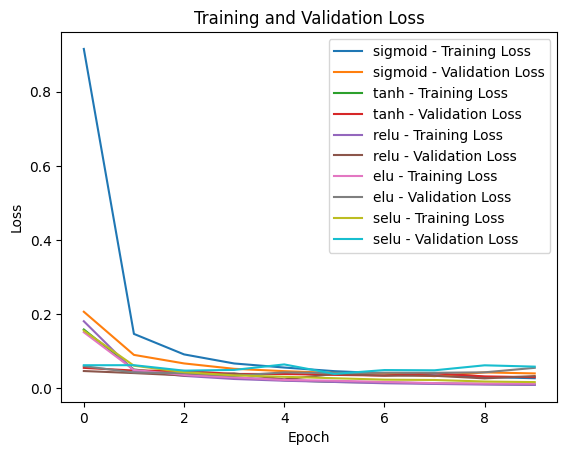

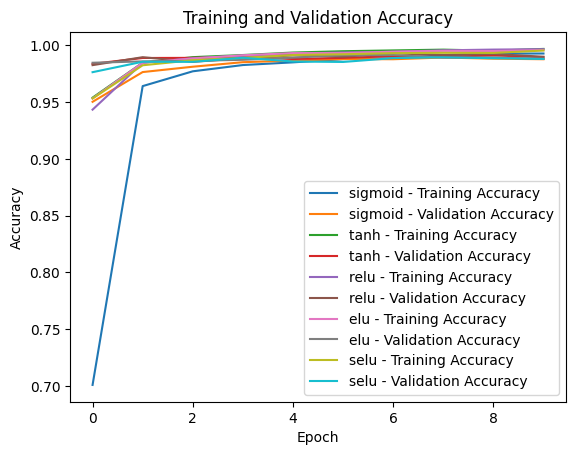

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
def build_cnn(activation_function):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_function))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_function))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Train the model with different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu', 'elu', 'selu']

for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    # Plot training loss and validation loss
    plt.plot(history.history['loss'], label=f'{activation_function} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{activation_function} - Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
for activation_function in activation_functions:
    model = build_cnn(activation_function)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

    plt.plot(history.history['accuracy'], label=f'{activation_function} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{activation_function} - Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



 I've chosen the ReLU activation function and the Adam optimizer with a learning rate of 0.001 to plot the training loss, validation loss by epoch, training accuracy and validation accuracy by epoch. The 0.001 learning rate was selected due to the number of epochs, 10, to avoid overfitting with a higher learning rate.